In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
movie  = pd.read_csv('my_movies.csv')

In [3]:
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [41]:
movie1 = movie.drop(['V1','V2','V3','V4','V5'],axis=1)

In [42]:
movie1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# EXPLORATORY DATA ANALYSIS

In [43]:
movie1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [44]:
movie1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
movie1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [46]:
movie1.isna().sum()


Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [47]:
movie1.shape

(10, 10)

In [48]:
movie1.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [49]:
# examine duplicated rows
movie1.loc[movie1.duplicated(), :]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0


In [50]:
movie2 = movie1.drop_duplicates(keep="first")


In [51]:
movie2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [52]:
movie2.shape

(7, 10)

In [53]:
for i in movie2.columns:
    print(i)
    print(movie2[i].value_counts())
    print()

Sixth Sense
0    4
1    3
Name: Sixth Sense, dtype: int64

Gladiator
1    4
0    3
Name: Gladiator, dtype: int64

LOTR1
0    5
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    5
1    2
Name: Harry Potter1, dtype: int64

Patriot
0    4
1    3
Name: Patriot, dtype: int64

LOTR2
0    5
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    6
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    6
1    1
Name: LOTR, dtype: int64

Braveheart
0    6
1    1
Name: Braveheart, dtype: int64

Green Mile
0    5
1    2
Name: Green Mile, dtype: int64



# Apriori Algorithm

model 1

In [54]:
frequent_itemsets = apriori(movie2,min_support=0.1,use_colnames=True)
frequent_itemsets

C:\Users\vinod kumar N\anaconda4\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [55]:
rules1 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
237,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
238,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
239,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
240,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


In [56]:
rules2 = association_rules(frequent_itemsets,metric='lift',min_threshold=0.6).head(30)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
5,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
6,(Sixth Sense),(Patriot),0.428571,0.428571,0.142857,0.333333,0.777778,-0.040816,0.857143
7,(Patriot),(Sixth Sense),0.428571,0.428571,0.142857,0.333333,0.777778,-0.040816,0.857143
8,(Sixth Sense),(LOTR2),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
9,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857


In [57]:
rules3 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.1)
rules3[rules3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
237,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
238,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
239,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
240,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


In [58]:
rules3.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
163,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR1)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
134,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
174,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
176,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
128,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
98,"(Gladiator, Green Mile)",(LOTR),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
177,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
179,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
207,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
206,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf


In [59]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
237,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
238,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
239,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
240,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


# VISUALIZATION for Model 1

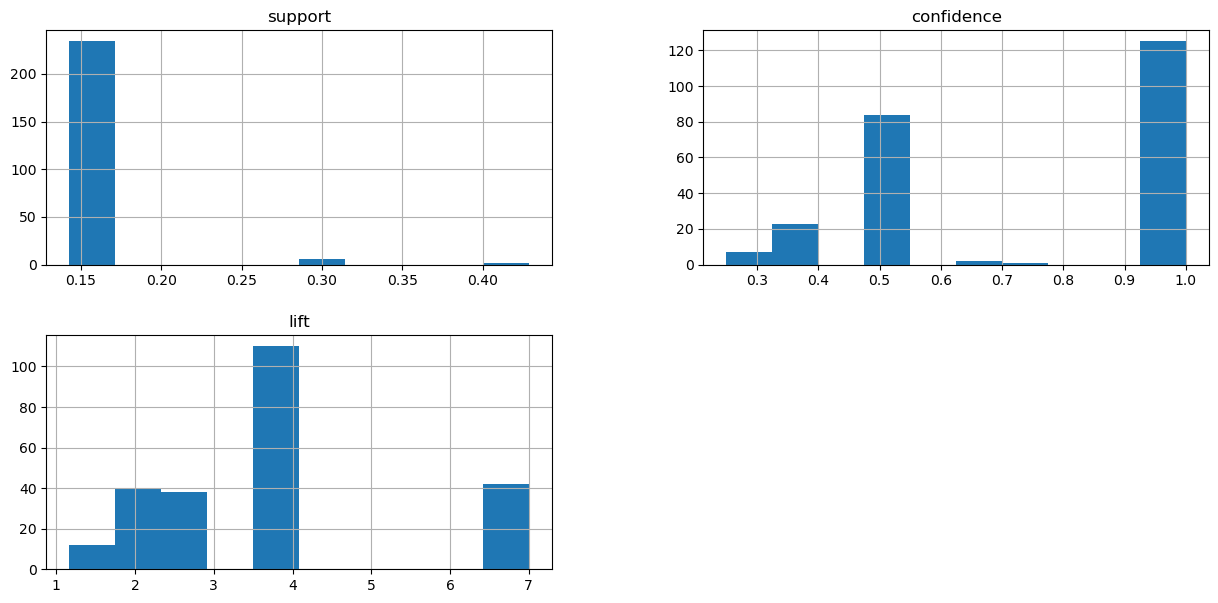

In [60]:
import matplotlib.pyplot as plt
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()


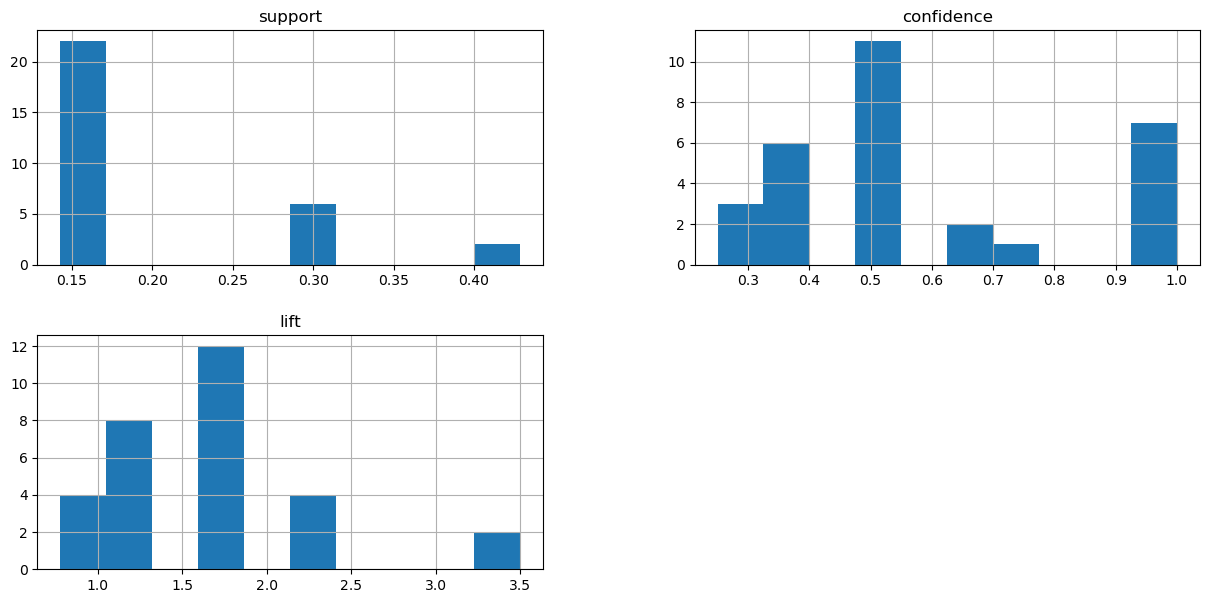

In [61]:
import matplotlib.pyplot as plt
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

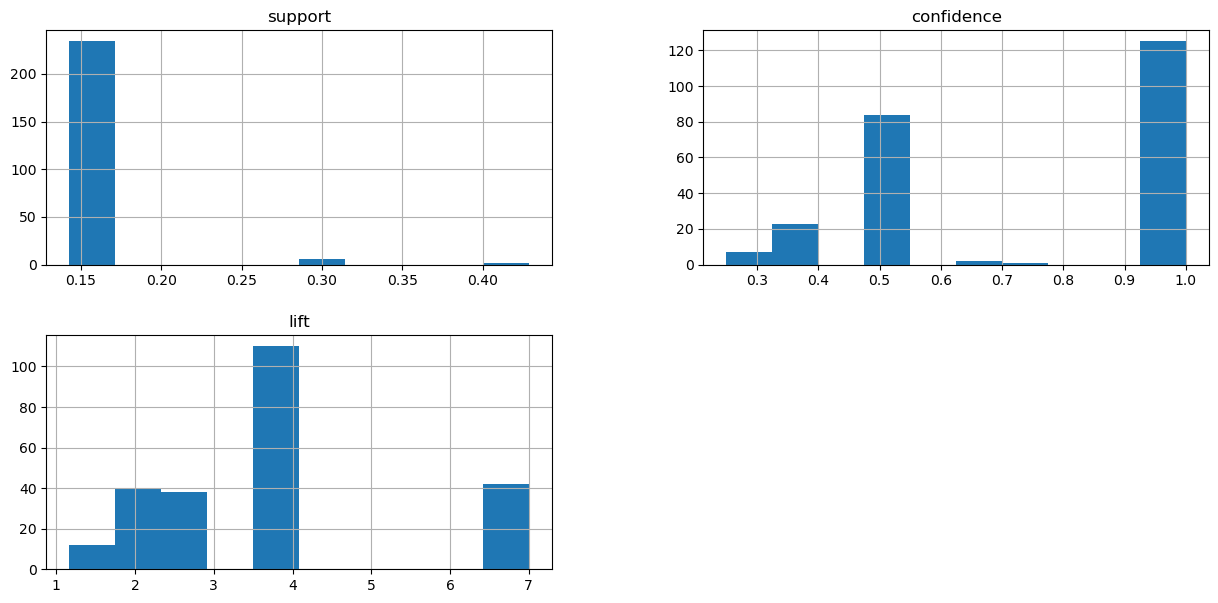

In [62]:
import matplotlib.pyplot as plt
rules3[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

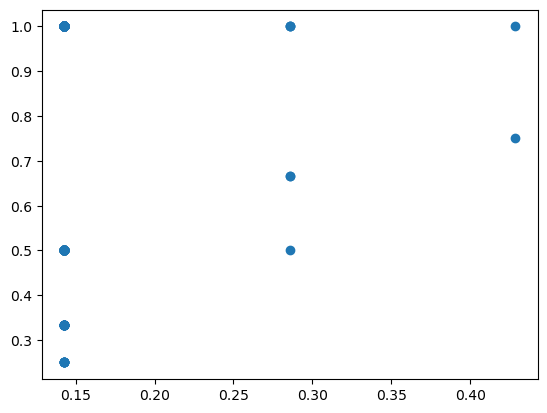

In [63]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

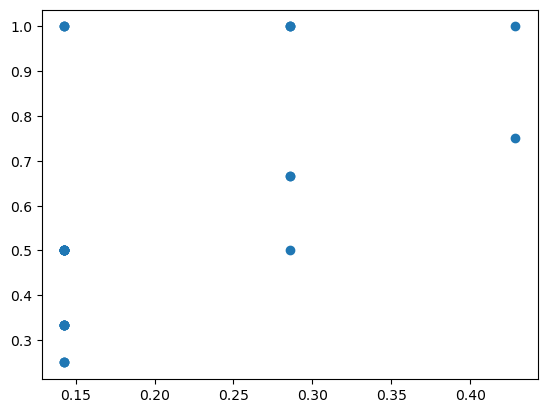

In [64]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

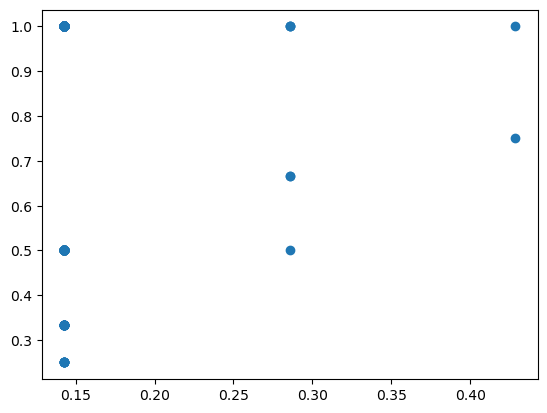

In [65]:
plt.scatter(rules3['support'], rules3['confidence'])
plt.show()

C:\Users\vinod kumar N\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


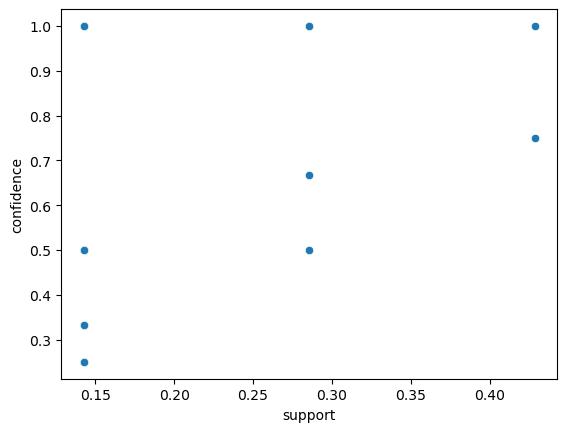

In [66]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules1,)

plt.show()

C:\Users\vinod kumar N\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


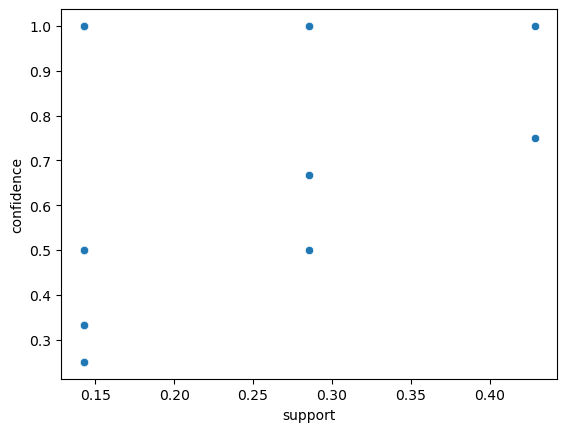

In [67]:
sns.scatterplot('support', 'confidence', data=rules2,)

plt.show()

C:\Users\vinod kumar N\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


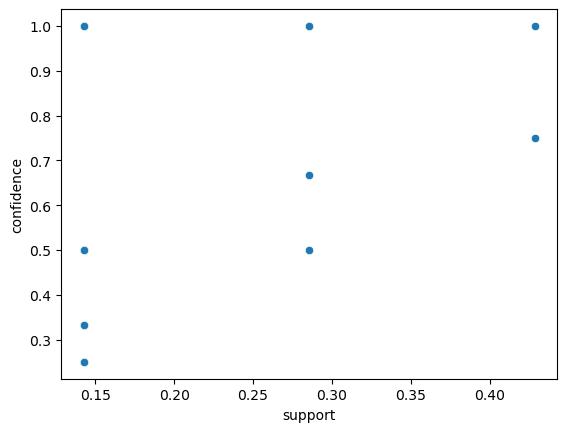

In [68]:
sns.scatterplot('support', 'confidence', data=rules3,)

plt.show()

# Apriori Algorithm

# model 2

In [69]:
frequent_itemsets2 = apriori(movie2,min_support=0.3,use_colnames=True)
frequent_itemsets2

C:\Users\vinod kumar N\anaconda4\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.428571,(Patriot)
3,0.428571,"(Gladiator, Patriot)"


In [70]:
rules4 = association_rules(frequent_itemsets2,metric='lift',min_threshold=1.0)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.75,1.75,0.183673,2.285714
1,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.00,1.75,0.183673,inf


In [71]:
rules5 = association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.75,1.75,0.183673,2.285714
1,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.00,1.75,0.183673,inf


# VISUALIZATION for Model 2

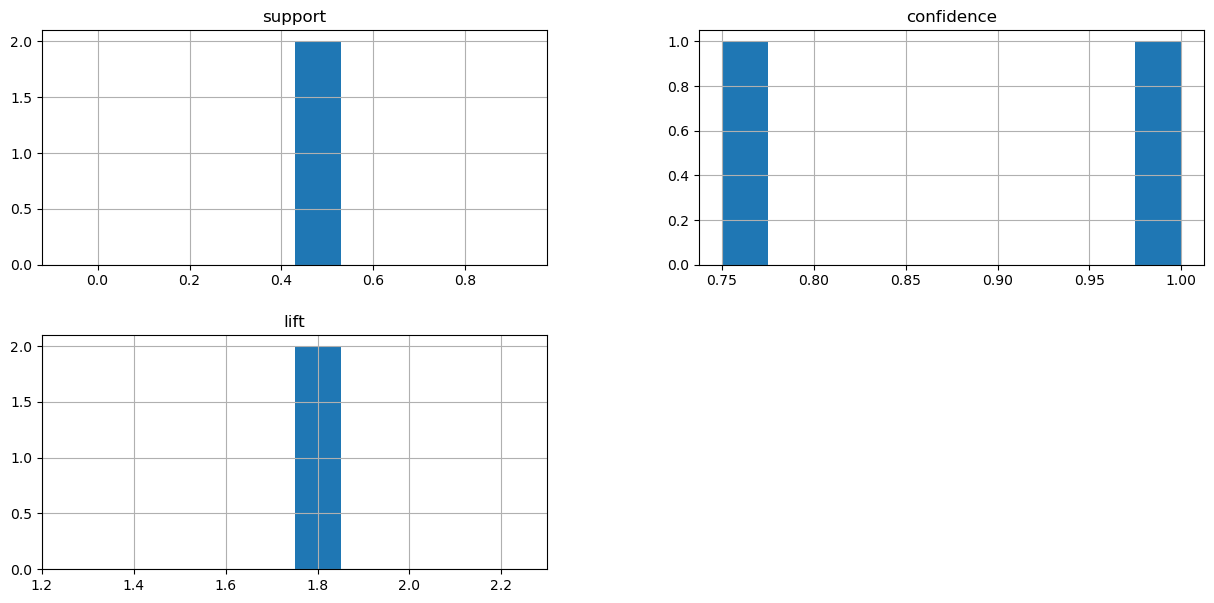

In [72]:
import matplotlib.pyplot as plt
rules4[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

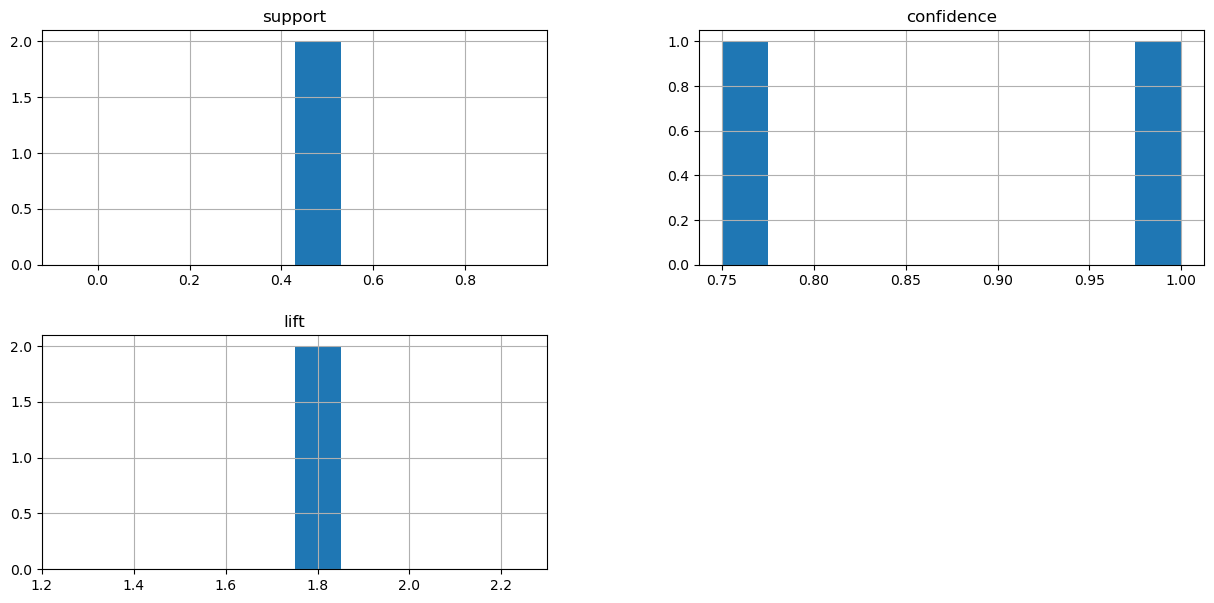

In [73]:
import matplotlib.pyplot as plt
rules5[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

C:\Users\vinod kumar N\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


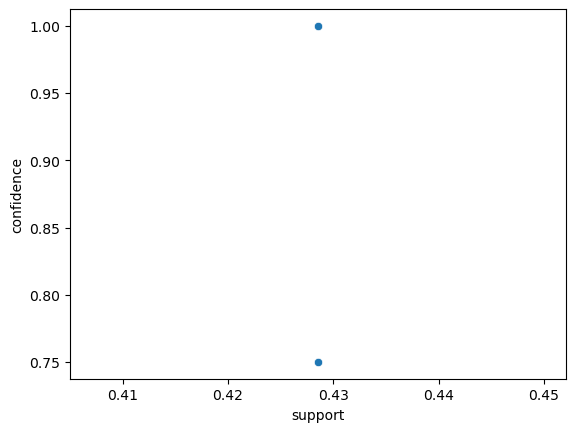

In [74]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules4,)
plt.show()

C:\Users\vinod kumar N\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


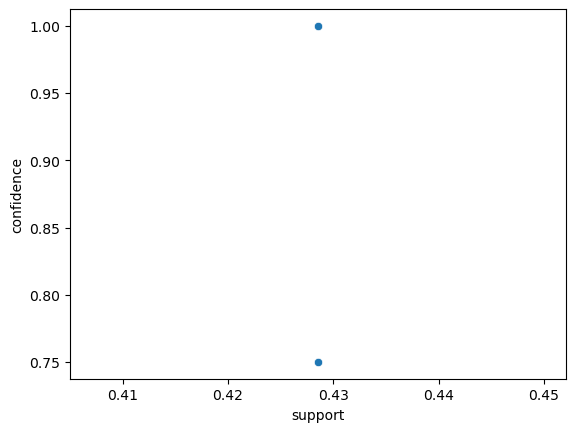

In [75]:
sns.scatterplot('support', 'confidence', data=rules5,)
plt.show()